In [3]:
import pandas as pd

data = pd.read_csv('data.csv')
temps = data['atemp'].values
rentals = data['cnt'].values

In [4]:
print(f'temps shape: {temps.shape}, reltals shape = {rentals.shape}')

temps shape: (731,), reltals shape = (731,)


In [5]:
pd.Series(temps).describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
dtype: float64

In [6]:
pd.Series(rentals).describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
dtype: float64

In [7]:
rentals = rentals/1000
pd.Series(rentals).describe()

count    731.000000
mean       4.504349
std        1.937211
min        0.022000
25%        3.152000
50%        4.548000
75%        5.956000
max        8.714000
dtype: float64

Text(0, 0.5, 'Number of Rentals (in thousands)')

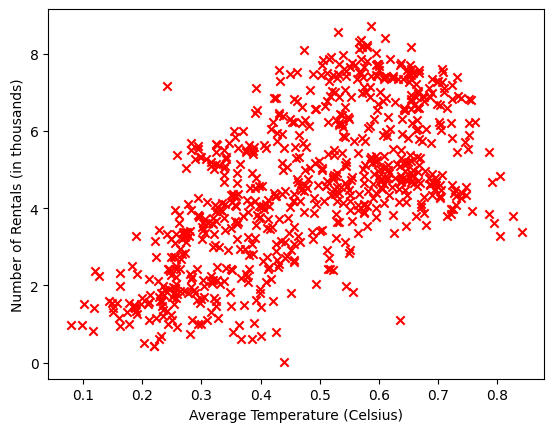

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Number of Rentals (in thousands)')

In [9]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.matmul(X, theta)
    cost = np.sum(np.square(predictions - y)) / (2 * m)
    return cost
    

In [10]:
theta = np.zeros(2)
X = np.column_stack((np.ones(len(temps)), temps))
y = rentals
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0. 0.]
cost: 12.018406441176468


In [11]:
# coding gradient descent for single variable linear regression
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

In [12]:
iterations = 5000
alpha = 0.1

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))


theta: [0.94588081 7.50171673]
cost: 1.1275869258439812


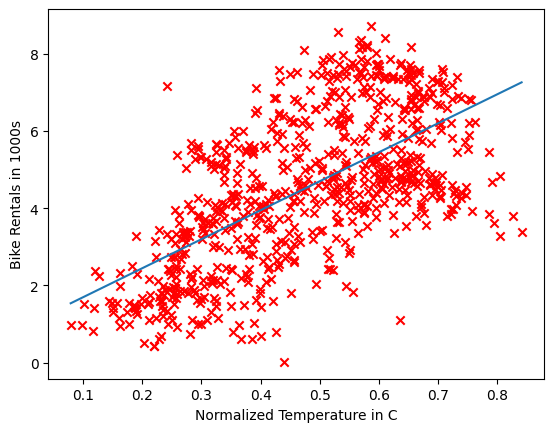

In [13]:
plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')
samples = np.linspace(min(temps), max(temps))
plt.plot(samples, theta[0] + theta[1] * samples)

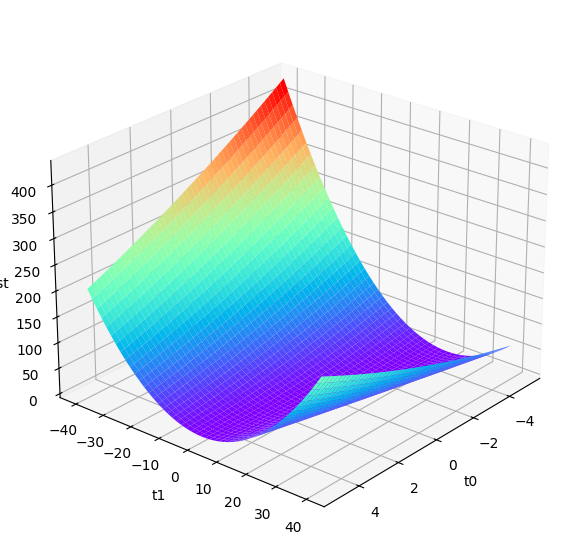

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

Xs, Ys = np.meshgrid(
    np.linspace(-5, 5, 50),
    np.linspace(-40, 40, 50)
)

Zs = np.array([
    compute_cost(X, y, [t0, t1])
    for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))
])
Zs = Zs.reshape(Xs.shape)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)

ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
plt.show()

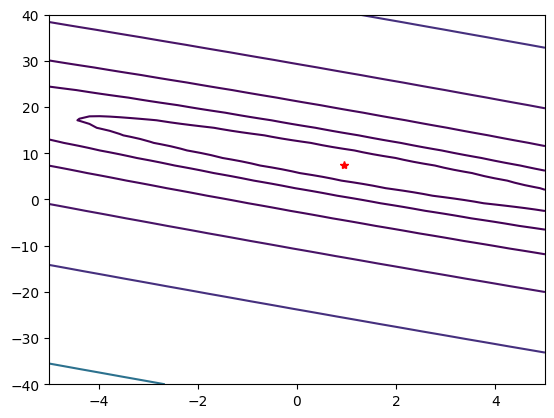

In [15]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))

# Multi Variable Linear Regression

In [21]:
#loading data

from sklearn.preprocessing import StandardScaler
import numpy as np

X = data[['atemp', 'hum', 'windspeed']].values

scalar = StandardScaler()
X = scalar.fit_transform(X)

X = np.column_stack((np.ones(len(X)), X))

y = data['cnt'].values/1000

In [24]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient

    return theta

alpha = 0.1
iterations = 5000
theta = gradient_descent_multi(X, y, theta, alpha, iterations)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost', cost)

theta: [ 9.13407874 -0.01427496  0.4814509 ]
cost 1.1735001845750472


Checking data using normal equation (since its not easy to visualize anymore)

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("./data.csv")
X = data[['atemp', 'hum', 'windspeed']].values
y = data['cnt'].values / 1000  # scale down

# Feature normalization (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Get the learned weights and bias
print("Bias (intercept):", model.intercept_)
print("Weights (coefficients):", model.coef_)

# Optional: predict
y_pred = model.predict(X_scaled)

Bias (intercept): 4.504348837209301
Weights (coefficients): [ 1.22203893 -0.45083331 -0.34166068]
